In [5]:
import pandas as pd
import os 
from sqlalchemy import create_engine
import logging
import time

logging.basicConfig(
    filename="logs/ingenstion_db.log",
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="a"
)
 
engine = create_engine('sqlite:///inventory.db')

def ingest_db(df,table_name,engine):
    '''this uction will ingest the datarame into database table'''
    df.to_sql(table_name,con=engine,if_exists = 'replace',index=False)

def load_raw_data():
    '''this uction will load the CSVs as dataframe and ingest into db'''
    start = time.time()
    for file in os.listdir('data'):
       if '.csv' in file:
           df = pd.read_csv('data/'+file)
           logging.info(f'Ingesting {file} in db')
           ingest_db(df,file[:-4],engine)
    end = time.time()
    total_time =(end - start)/60
    logging.info('-----------------Ingestion Complete-----------------')
    logging.info(f'\n total time taken: {total_time} minutes')

if __name__ == '__main__':
    load_raw_data()

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [29]:
pd.read_sql_query("select*from vendor_sales_summary",conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,65.66,1.47,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,1.98,0.99,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,143.28,77.61,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388


In [39]:
# Loading the database connection
conn = sqlite3.connect('inventory.db')

#fetching vendor summary data 
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [41]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05


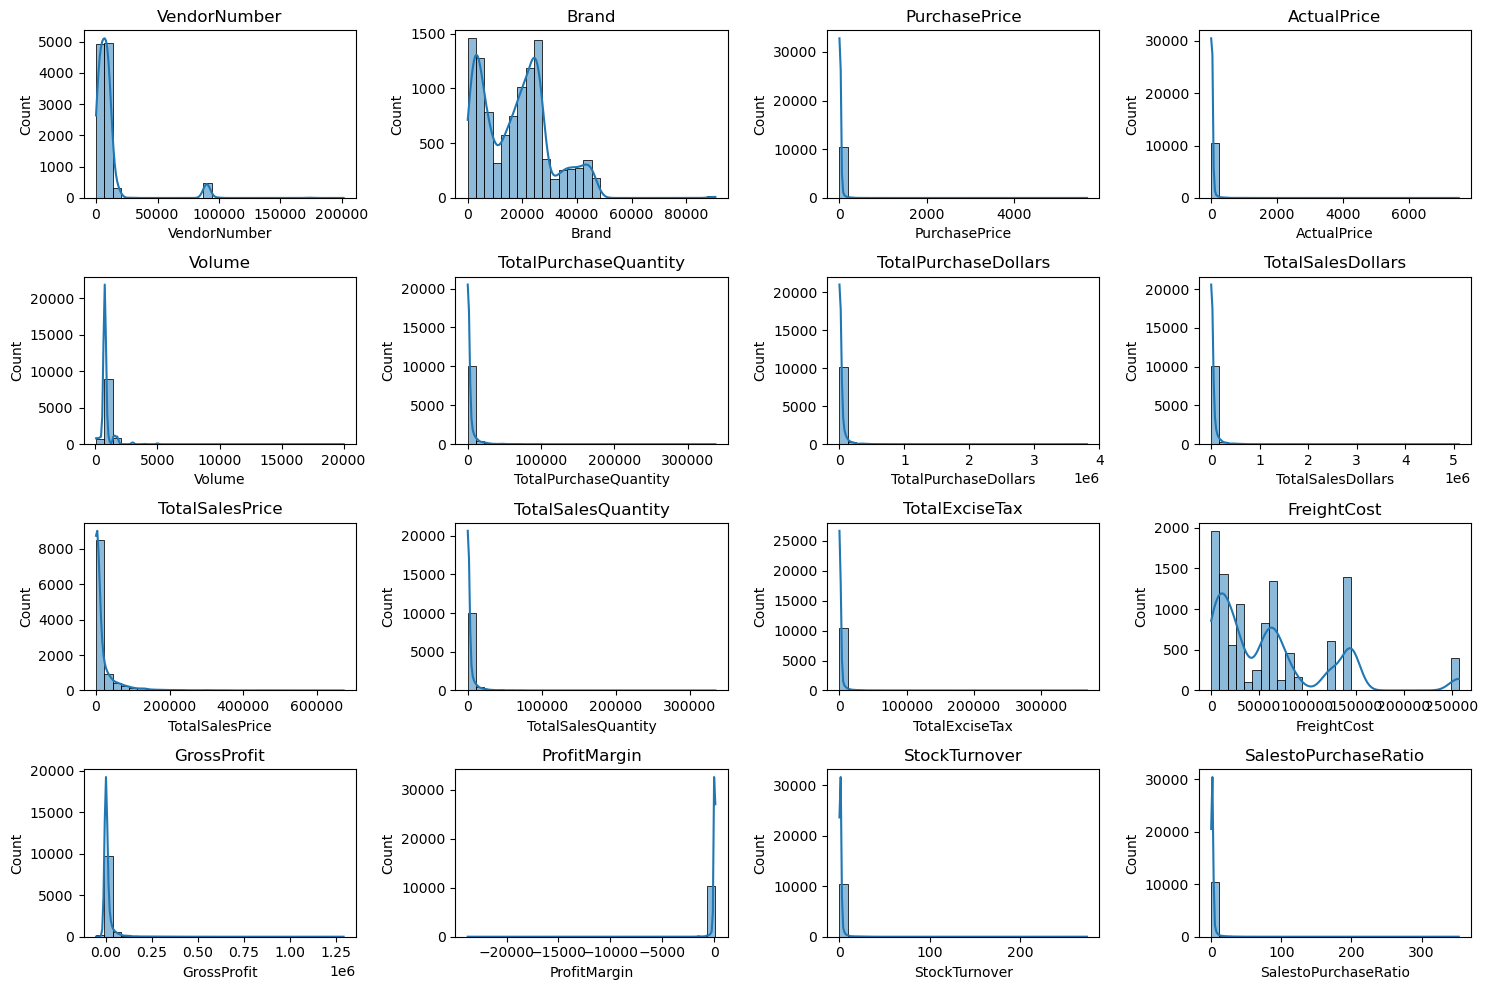

In [43]:
#Distribution Polts for Numerical Column
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #Adjust grid layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

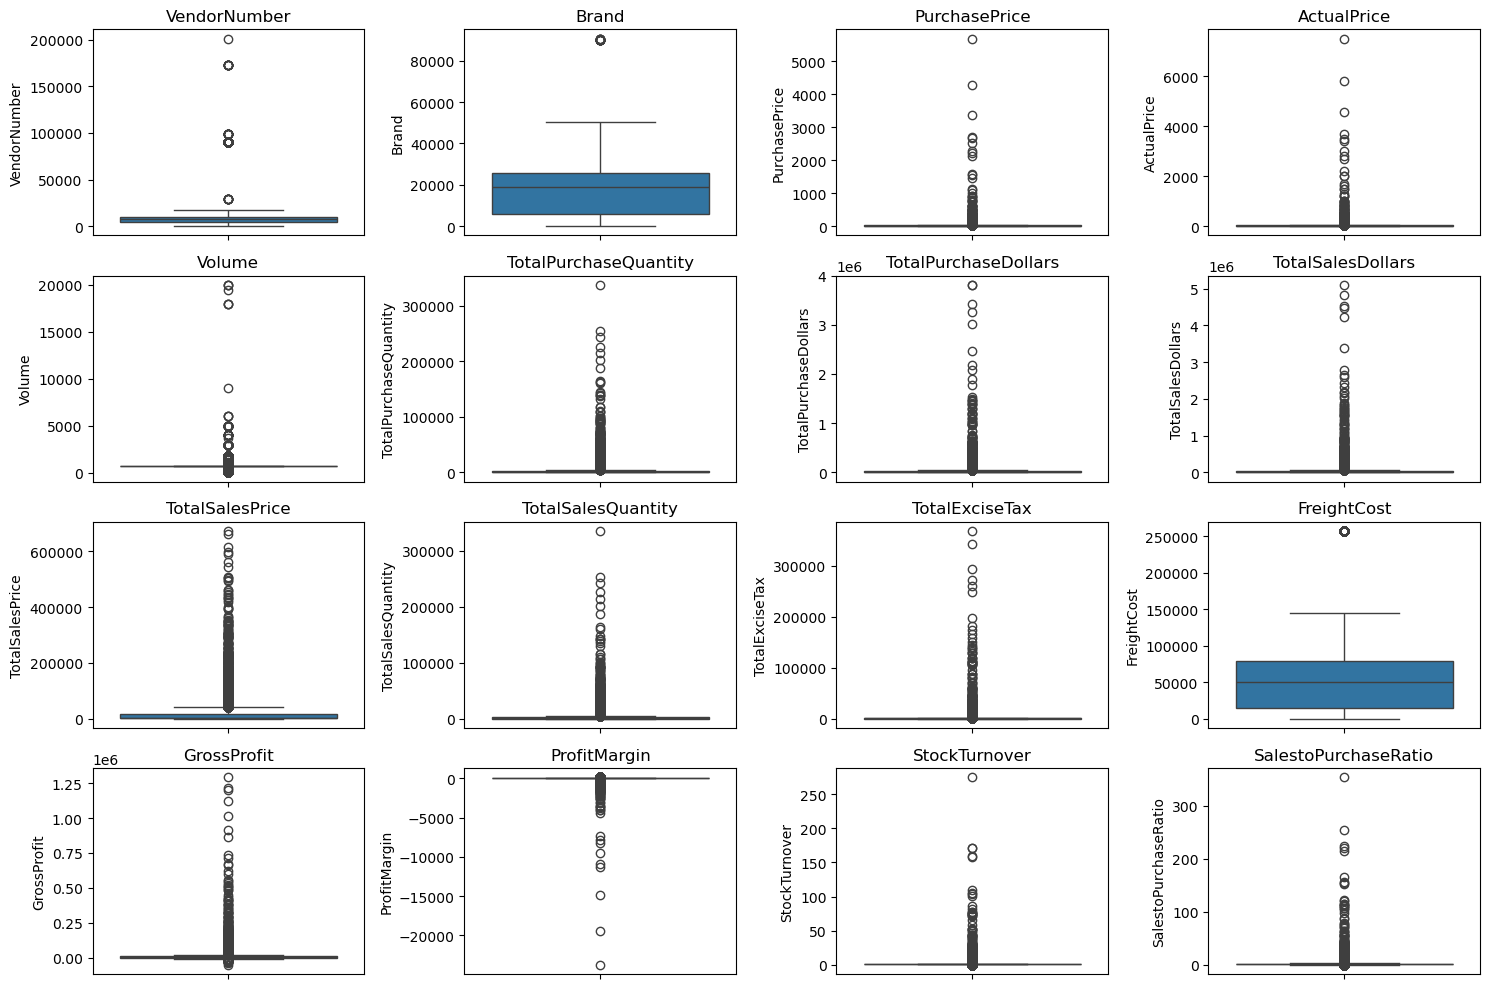

In [45]:
#Outlier Detection with Boxplosts
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [49]:
# lets filter the data by removing inconsistencies
df = pd.read_sql_query("""SELECT * 
FROM vendor_sales_summary
WHERE GrossProfit >0 
AND ProfitMargin >0
AND TotalSalesQuantity >0""",conn)

In [52]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,65.66,1.47,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,1.98,0.99,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,143.28,77.61,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388


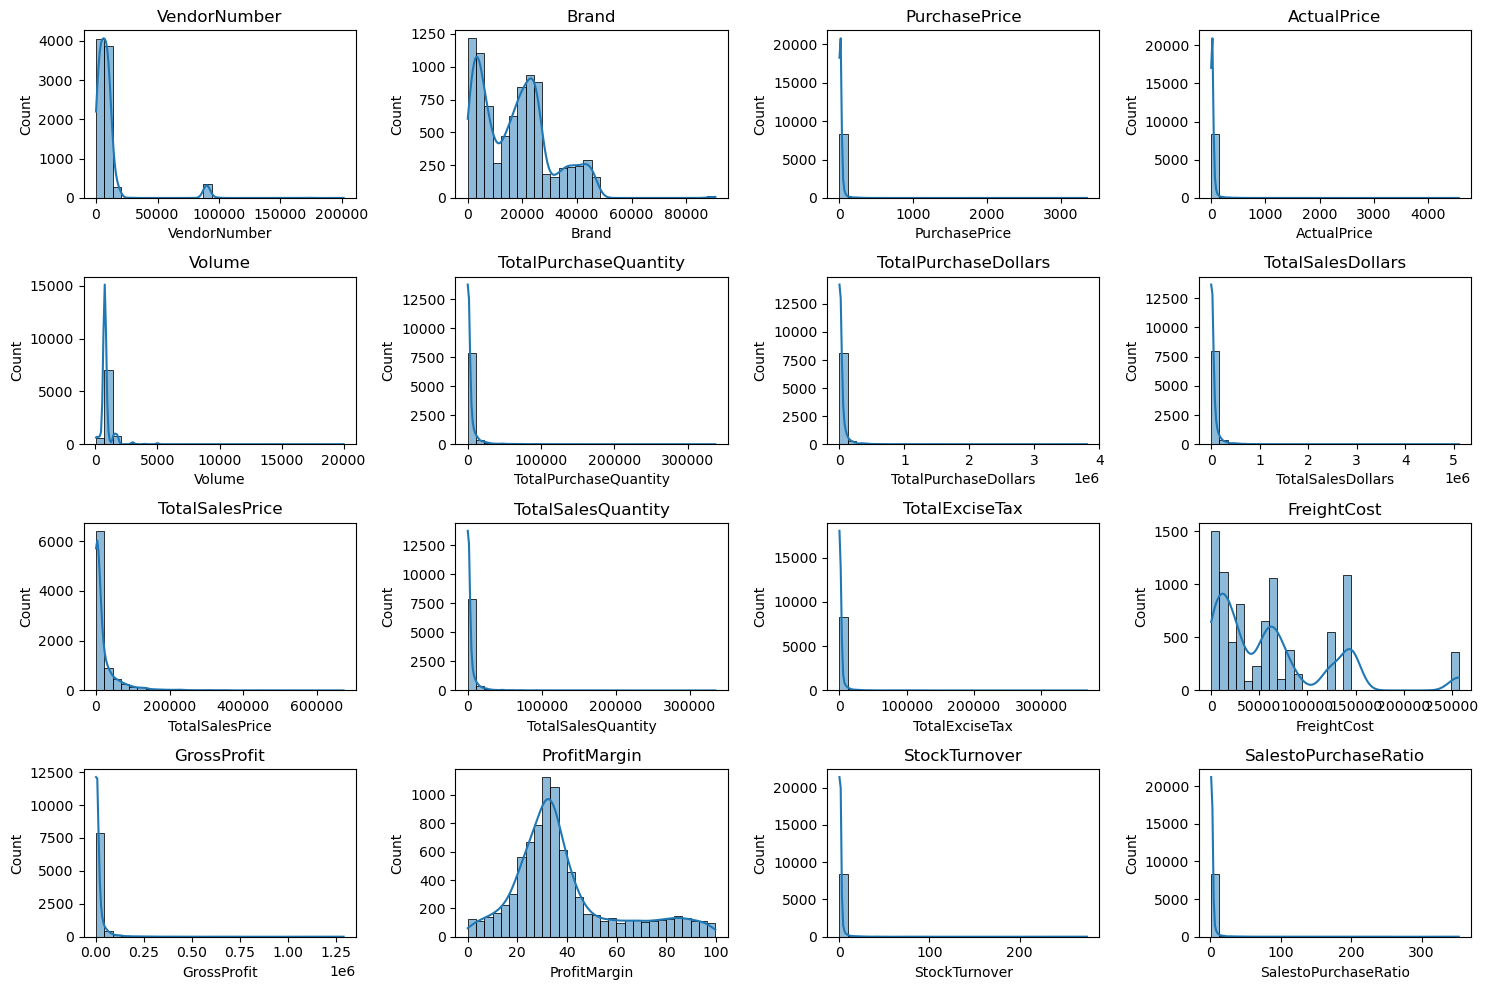

In [54]:
#Distribution Polts for Numerical Column
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #Adjust grid layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

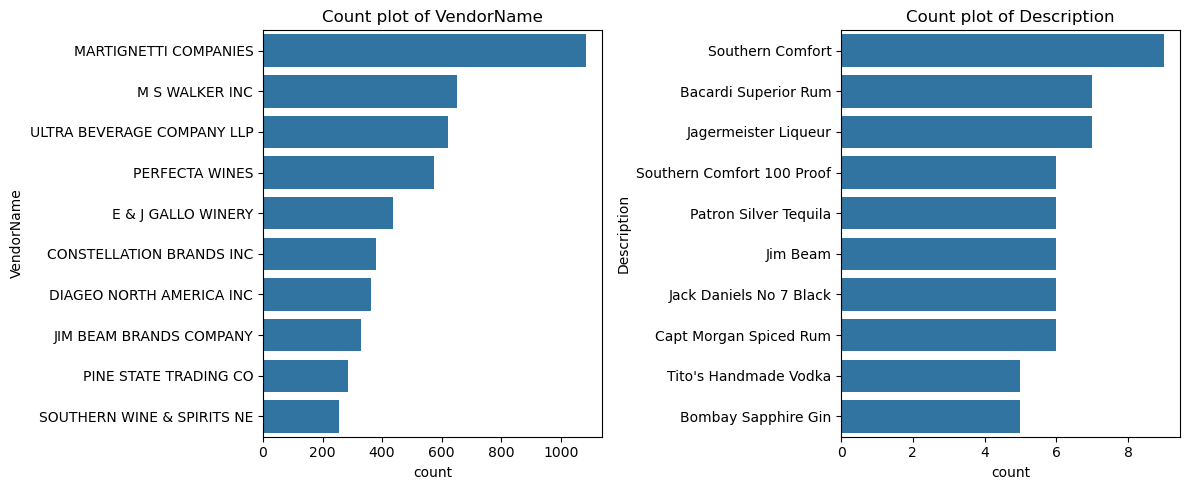

In [64]:
# count plots for Categorical Columns
categorical_cols = ["VendorName","Description"]
plt.figure(figsize=(12,5))
for i , col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])#Top 10 categories
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

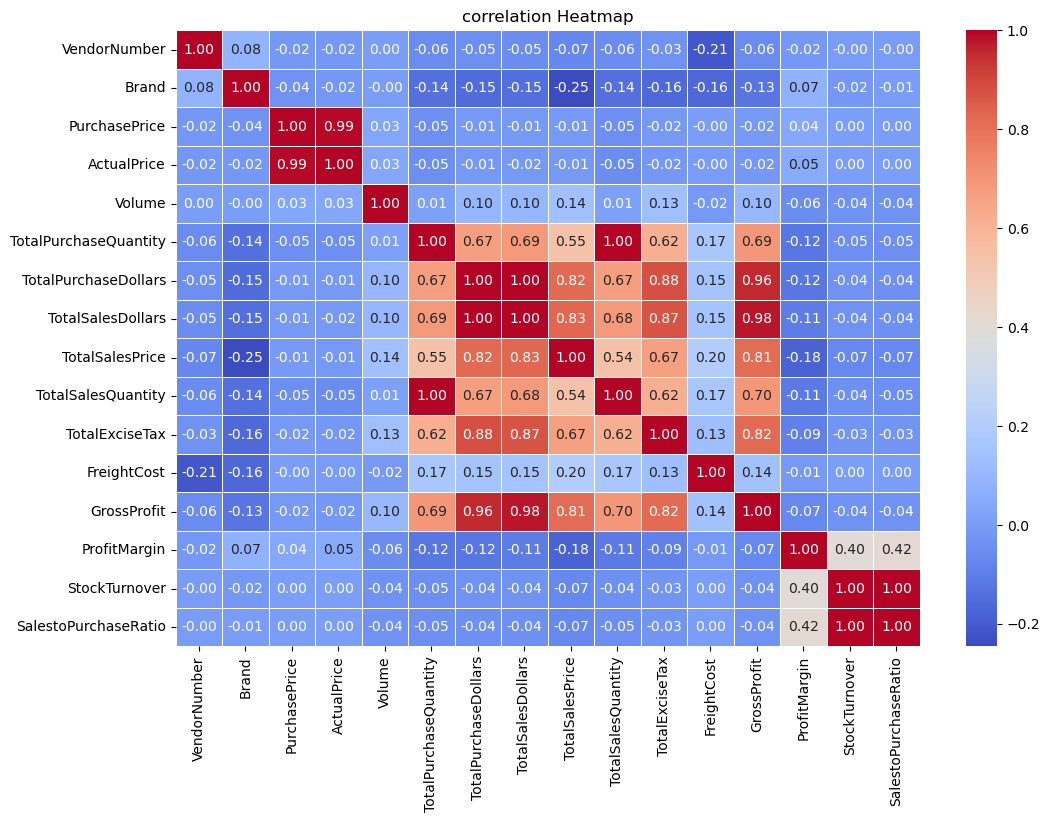

In [66]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("correlation Heatmap")
plt.show()

# Data Analysis

In [79]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [330]:
brand_performance.to_csv("brand_performance.csv",index=False)

In [83]:
low_sales_threshold= brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold= brand_performance['ProfitMargin'].quantile(0.85)


In [85]:
low_sales_threshold

560.299

In [91]:
high_margin_threshold

64.97017552750113

In [93]:
#filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with low sales but High Profit Margin:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but High Profit Margin:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [141]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] <10000]#for better visualization

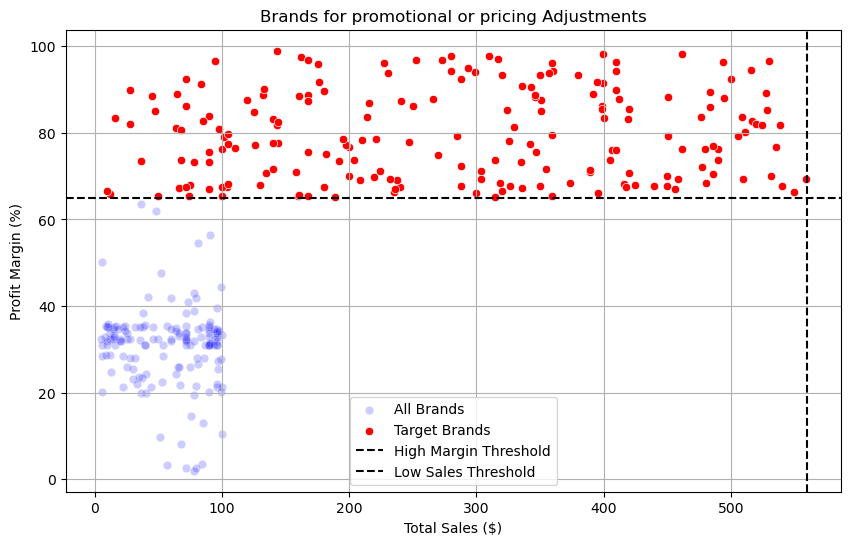

In [143]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='TotalSalesDollars',y='ProfitMargin', color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands,x='TotalSalesDollars',y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold,linestyle='--', color="black", label="High Margin Threshold")
plt.axvline(low_sales_threshold,linestyle='--', color="black", label="Low Sales Threshold")


plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for promotional or pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()



In [149]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [145]:
# TOp Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors


VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [147]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [151]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

In [153]:
top_vendors.apply(lambda x: format_dollars(x))


VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

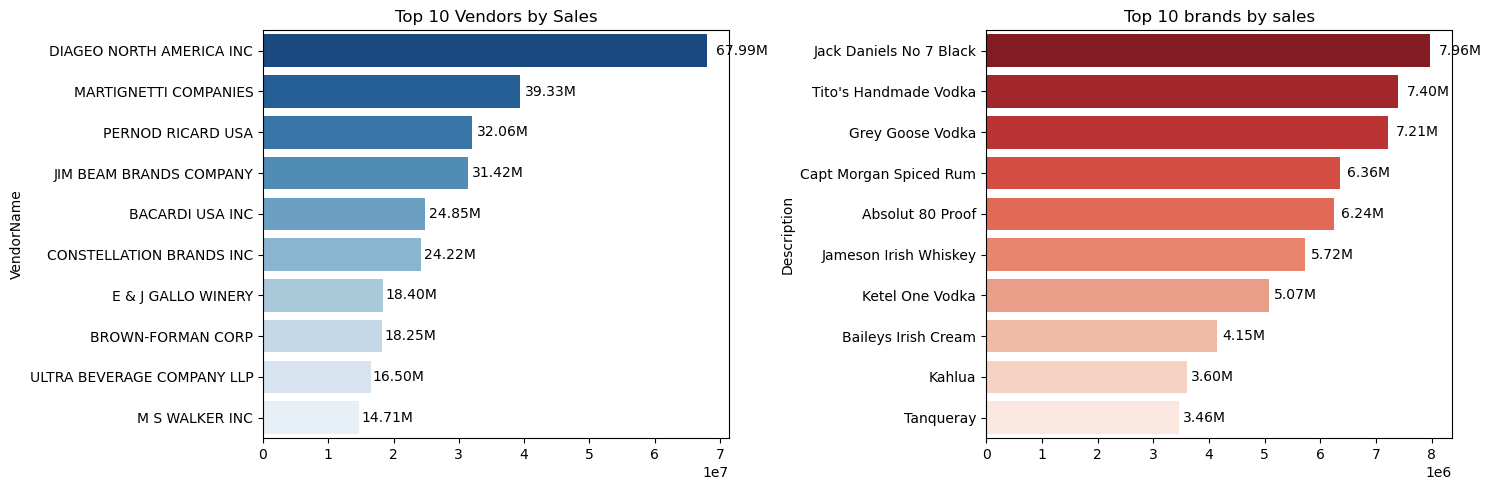

In [165]:
plt.figure(figsize=(15,5))
#plot for top vendors
plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendors.index, x=top_vendors.values,palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize=10,color='black')

# polt for top brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values,palette="Reds_r")
plt.title("Top 10 brands by sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize=10,color='black')

plt.tight_layout()
plt.show()
    

In [199]:
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()
vendor_performance.shape

(119, 4)

In [256]:
vendor_performance['Purchase_Contribution%']=vendor_performance['TotalPurchaseDollars']/ vendor_performance['TotalPurchaseDollars'].sum()*100

In [258]:
vendor_performance=round(vendor_performance.sort_values('Purchase_Contribution%',ascending = False),2)

In [260]:
# Display top 10 vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Purchase_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,3.18


In [262]:
top_vendors['Cumulative_contribution']=top_vendors['Purchase_Contribution%'].cumsum()
top_vendors


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Purchase_Contribution%,Cumulative_contribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,3.18,65.69


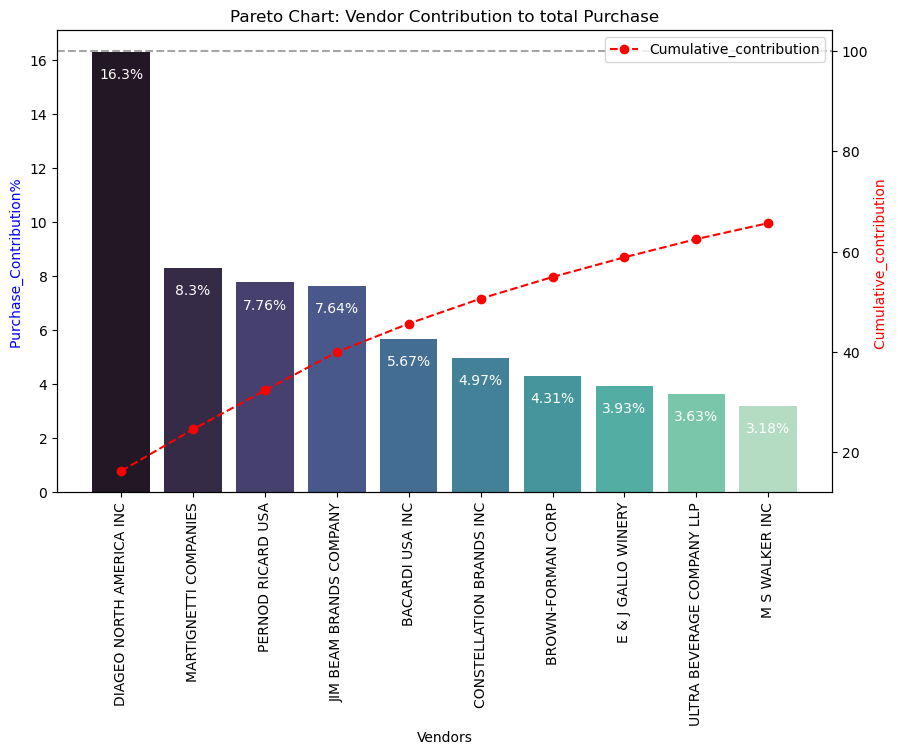

In [264]:
fig, ax1 = plt.subplots(figsize=(10,6))
#bar plot for purchase Contribution% 
sns.barplot(x=top_vendors['VendorName'],y=top_vendors['Purchase_Contribution%'], palette="mako",ax=ax1)

for i,value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i,value-1, str(value)+'%',ha='center',fontsize=10,color='white')

#line plot for cummlativr contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['Cumulative_contribution'],color='red',marker = 'o',linestyle='dashed',label='Cumulative_contribution')

ax1.set_xticklabels(top_vendors['VendorName'],rotation = 90)
ax1.set_ylabel('Purchase_Contribution% ',color='blue')
ax2.set_ylabel('Cumulative_contribution ',color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to total Purchase')

ax2.axhline(y=100,color='gray',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

In [266]:
print(f"Total Purchase contribution of top 10 vendors is {round(top_vendors['Purchase_Contribution%'].sum(),2)}%")

Total Purchase contribution of top 10 vendors is 65.69%


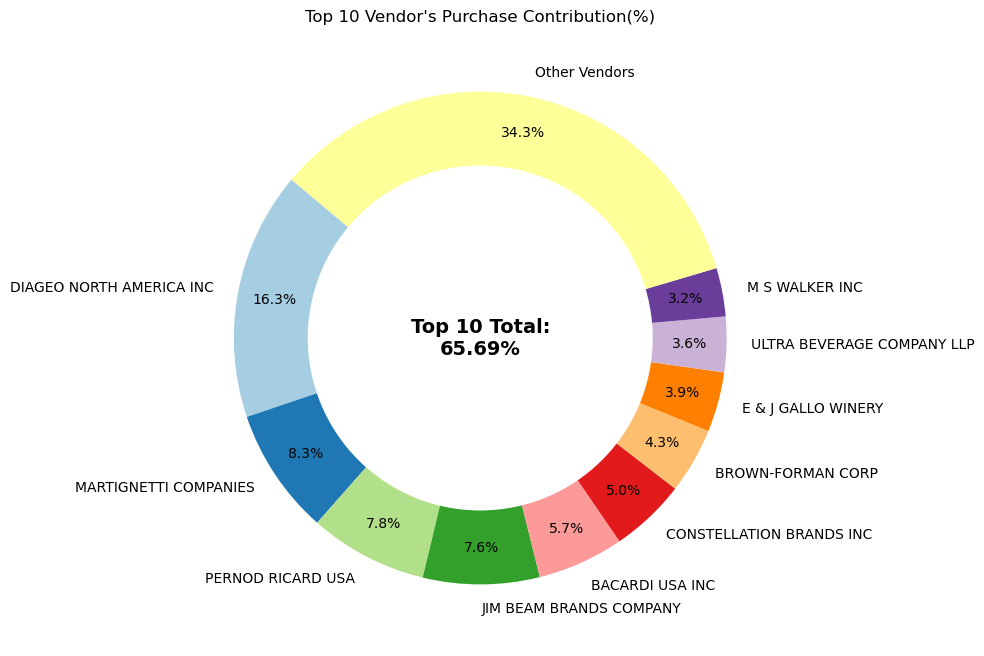

In [272]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100-total_contribution

#Append "other vendors"category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

#Donut Chart
fig,ax = plt.subplots(figsize=(8,8))
wedges,texts,autotexts=ax.pie(purchase_contributions,labels=vendors,autopct='%1.1f%%',
                             startangle=140,pctdistance=0.85,colors=plt.cm.Paired.colors)

#Draw a white circle in the center to create a 'donut' effect

center_circle=plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(center_circle)

#add total contribution annotation in the center
plt.text(0,0,f"Top 10 Total:\n{total_contribution:.2f}%",fontsize=14,fontweight='bold',ha='center',va='center')

plt.title("Top 10 Vendor's Purchase Contribution(%)")
plt.show()

In [361]:
PurchaseContribution.to_csv("PurchaseContribution.csv",index=False)

NameError: name 'PurchaseContribution' is not defined

In [274]:
# does purchasing in bulk reduce the unit price,and what is the optimal purchase volume for cost savings?

In [276]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [287]:
df["OrderSize"]=pd.qcut(df["TotalPurchaseQuantity"],q=3,labels=["Small","Medium","Large"])

In [294]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


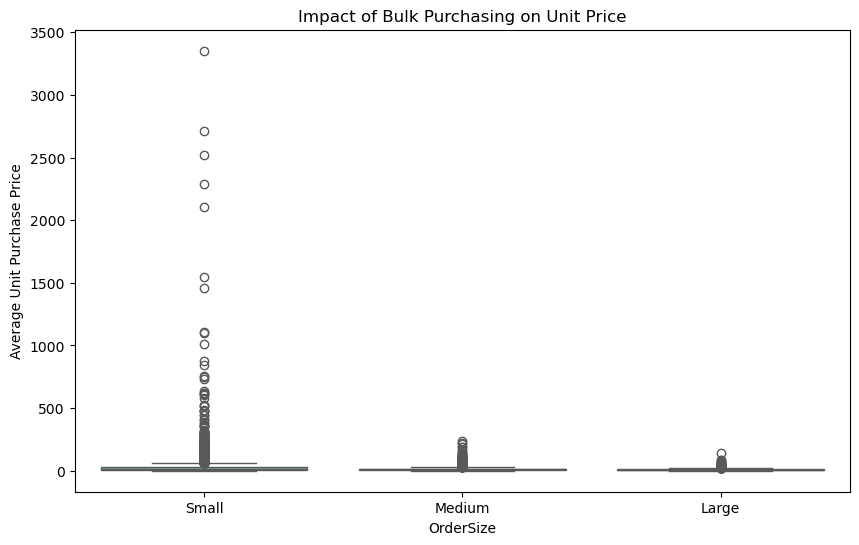

In [296]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="OrderSize",y="UnitPurchasePrice",palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("OrderSize")
plt.ylabel("Average Unit Purchase Price")
plt.show()

In [298]:
# which vendors have low inventory turnover indicating excess stock and slow-moving priducts

In [304]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [306]:
# how much capital is locked in unsold inventory per vendor and which vendors contribute the most to it

In [308]:
df["UnsoldInventoryValue"]=(df["TotalPurchaseQuantity"]-df["TotalSalesQuantity"])*df["PurchasePrice"]
print('Total Unsold Capital:',format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 2.71M


In [310]:
# aggregate Capital Locked per vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# sort vendors with the Highest locked capital
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue",ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue']=inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)


,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


In [312]:
# what is the 95% confidance intervals for profit margins of top perrfroming and low performing vendors


In [314]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)



In [316]:
top_vendors = df[df["TotalSalesDollars"]>=top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"]<=low_threshold]["ProfitMargin"].dropna() 



In [318]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [320]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [322]:
def confidence_interval(data,confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data,ddof=1)/np.sqrt(len(data))  #standard error
    t_critical=stats.t.ppf((1+confidence)/2,df=len(data)-1)
    margin_of_error = t_critical*std_err
    return mean_val,mean_val-margin_of_error,mean_val+margin_of_error

Top Vendors 95% CI: (30.74,31.61),Mean:31.18
Low Vendors 95% CI: (40.50,42.64),Mean:41.57


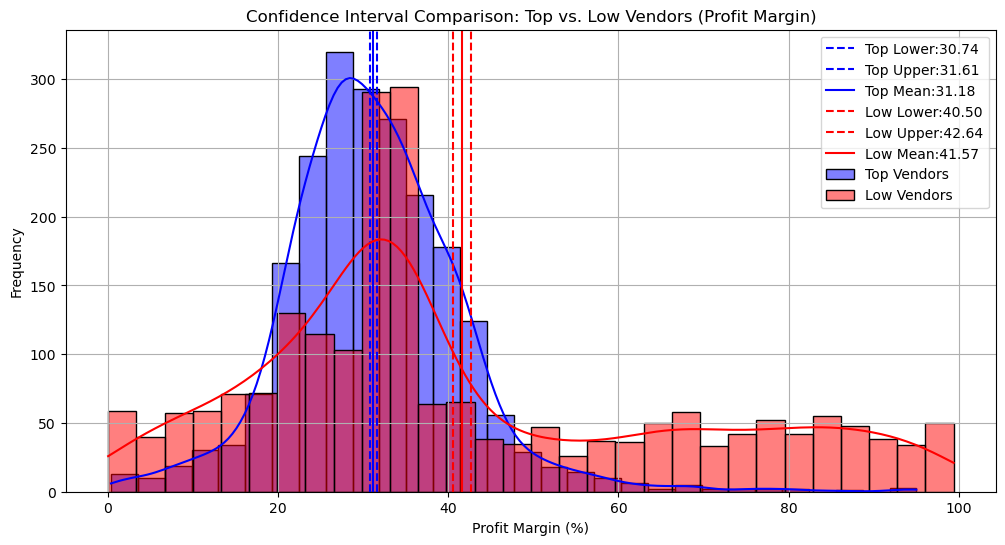

In [324]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f},{top_upper:.2f}),Mean:{top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f},{low_upper:.2f}),Mean:{low_mean:.2f}")

plt.figure(figsize=(12,6))

#top vendors plot

sns.histplot(top_vendors,kde=True,color="blue",bins=30,alpha=0.5,label="Top Vendors")
plt.axvline(top_lower,color="blue",linestyle="--",label=f"Top Lower:{top_lower:.2f}")
plt.axvline(top_upper,color="blue",linestyle="--",label=f"Top Upper:{top_upper:.2f}")
plt.axvline(top_mean,color="blue",linestyle="-",label=f"Top Mean:{top_mean:.2f}")

#low vendors polt 
sns.histplot(low_vendors,kde=True,color="red",bins=30,alpha=0.5,label="Low Vendors")
plt.axvline(low_lower,color="red",linestyle="--",label=f"Low Lower:{low_lower:.2f}")
plt.axvline(low_upper,color="red",linestyle="--",label=f"Low Upper:{low_upper:.2f}")
plt.axvline(low_mean,color="red",linestyle="-",label=f"Low Mean:{low_mean:.2f}")


#finalize plot

plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [326]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"]>=top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"]<=low_threshold]["ProfitMargin"].dropna() 

# perfrom two sample t-test
t_stat,p_value=ttest_ind(top_vendors,low_vendors,equal_var=False)

#print results
print(f"T-Statistic:{t_stat:4f},p-Value:{p_value:.4f}")
if p_value<0.05:
    print("Reject µ0: There is a significant difference in profit margins between top and low perfroming vendors.")
else:
    print("fail to Reject µ0: No significant difference in profit margins.")

T-Statistic:-17.669523,p-Value:0.0000
Reject µ0: There is a significant difference in profit margins between top and low perfroming vendors.


In [334]:
low_vendors


5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [344]:
Purchase Contribution

SyntaxError: invalid syntax (360784380.py, line 1)